In [6]:
import numpy as np
import matplotlib.pyplot as plt
import fkplotlib

%matplotlib notebook
fkplotlib.use_txfonts()

kb = np.double(1.380650e-23)  # Boltzmann  [SI]
h = np.double(6.62607e-34)  # Planck     [SI]
c = np.double(2.99792e8)  #           [SI]
Tcmb = 2.725  # K
I0 = 2.0 * (kb * Tcmb) ** 3.0 / (h * c) ** 2.0 * 1.0e20  # MJy/sr

y = 0.1


def B(nu, T):
    return (2.0 * h * nu ** 3.0 / c ** 2.0) * (np.exp(h * nu / (kb * T)) - 1.0) ** (-1.0)

def g_tsz(nu):
    x = h * nu / (kb * Tcmb)
    return (
        x ** (4.0)
        * np.exp(x)
        / (np.exp(x) - 1.0) ** (2.0)
        * (x * ((np.exp(x) + 1) / (np.exp(x) - 1)) - 4.0)
    )
def g_ksz(nu):
    x = h * nu / (kb * Tcmb)
    return (
        x ** (4.0)
        * np.exp(x)
        / (np.exp(x) - 1.0) ** (2.0)
    )

nu = np.logspace(9.0, 20.0, 1500)
#nu = np.linspace(1.0, 1e12, 100)

<IPython.core.display.Javascript object>


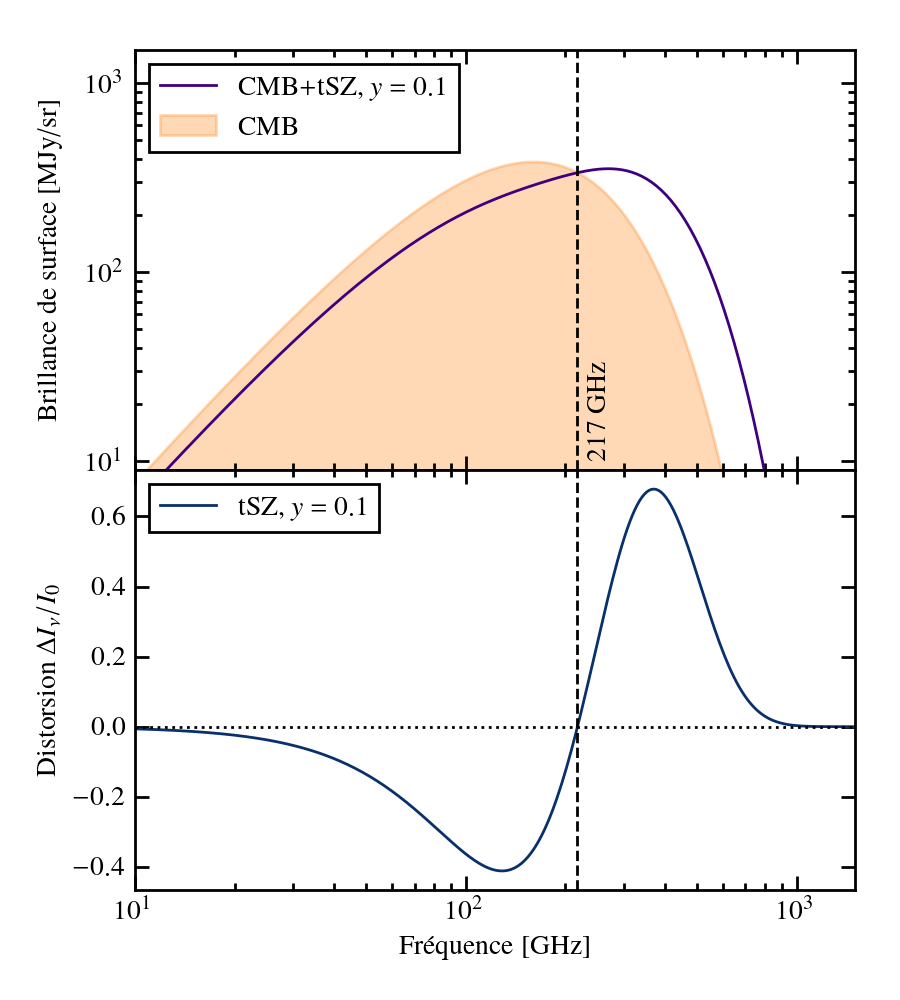

<ipython-input-6-5791315e6847>:18: RuntimeWarning: overflow encountered in exp
  return (2.0 * h * nu ** 3.0 / c ** 2.0) * (np.exp(h * nu / (kb * T)) - 1.0) ** (-1.0)
<ipython-input-6-5791315e6847>:24: RuntimeWarning: overflow encountered in exp
  * np.exp(x)
<ipython-input-6-5791315e6847>:23: RuntimeWarning: overflow encountered in multiply
  x ** (4.0)
<ipython-input-6-5791315e6847>:25: RuntimeWarning: overflow encountered in exp
  / (np.exp(x) - 1.0) ** (2.0)
<ipython-input-6-5791315e6847>:25: RuntimeWarning: overflow encountered in square
  / (np.exp(x) - 1.0) ** (2.0)
<ipython-input-6-5791315e6847>:23: RuntimeWarning: invalid value encountered in true_divide
  x ** (4.0)
<ipython-input-6-5791315e6847>:26: RuntimeWarning: overflow encountered in exp
  * (x * ((np.exp(x) + 1) / (np.exp(x) - 1)) - 4.0)
<ipython-input-6-5791315e6847>:26: RuntimeWarning: invalid value encountered in true_divide
  * (x * ((np.exp(x) + 1) / (np.exp(x) - 1)) - 4.0)
<ipython-input-6-5791315e6847>:24: Runti

In [32]:
ys = [0.10]
fig, axs = plt.subplots(2, 1, figsize=(4.5, 5))

axs[0].fill_between(
    nu / 1.0e9, 1, 1e20 * B(nu, Tcmb), lw=1.0, color="tab:orange", alpha=0.3, label="CMB"
)
for i, y in enumerate(ys):
    axs[0].plot(
        nu / 1e9, 1e20 * B(nu, Tcmb) + g_tsz(nu) * I0 * y, label=f"CMB+tSZ, $y={y}$", color=plt.cm.Purples_r(i/len(ys))
    )
    axs[1].plot(nu / 1e9, y * g_tsz(nu), label=f"tSZ, $y={y}$", color=plt.cm.Blues_r(i/len(ys)))

axs[0].set_ylabel(r"Brillance de surface [MJy/sr]")
axs[0].set_yscale("log")
axs[0].set_ylim(9, 1500)
axs[1].set_xlabel("Fréquence [GHz]")
axs[1].set_ylabel(r"Distorsion  $\Delta I_\nu / I_0$")
axs[1].axhline(0.0, 0, 1, color="k", ls=":")
    
fig.subplots_adjust(hspace=0, top=0.95)
fig.align_labels()
for ax in axs:
    ax.set_xscale("log")
    ax.set_xlim(10, 1500)
    ax.axvline(217, 0, 1, ls="--", color="k")
    fkplotlib.ax_legend(ax, loc=2)
    fkplotlib.ax_bothticks(ax)
axs[0].set_xticklabels([])
axs[0].text(
    230.0,
    0.02,
    "217 GHz",
    rotation=90,
    horizontalalignment="left",
    verticalalignment="bottom",
    transform=axs[0].get_xaxis_transform(),
    zorder=10,
    fontsize=10.0,
)
fig.subplots_adjust(left=0.15, right=0.95)
fig.savefig("CMB_SZ_spectrum.pdf")

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

tau = 1e-2
kT = 10.0
kT_mc2 = kT / 511.0
y = kT_mc2 * tau

# tSZ
ax.plot(nu / 1e9, 1e3 * y * g_tsz(nu), label=f"tSZ, $kT_e={kT}$ keV", color="tab:blue")

# kSZ
vs = [1500.0, 500.0, -500.0] # km/s
for i, v in enumerate(vs):
    y = v * tau / 3e5
    ax.plot(nu / 1e9, 1e3 * y * g_ksz(nu), label=f"kSZ, $v_z={v}$ km/s", color=plt.cm.Reds_r(i/len(vs)))


ax.set_xlabel("Fréquence [GHz]")
ax.set_ylabel(r"Distorsion spectrale $\Delta I_\nu / I_0 \;[{\rm \times 10^3}]$")
ax.axhline(0.0, 0, 1, color="k", ls=":")
    
ax.set_xscale("log")
ax.set_xlim(10, 1000)
ax.axvline(217, 0, 1, ls="--", color="k")
fkplotlib.ax_legend(ax, loc=2)
fkplotlib.ax_bothticks(ax)
fig.subplots_adjust(bottom=0.15, top=0.95)
fig.savefig("tSZ_kSZ_spectrum.pdf")

In [ ]:
np.sqrt((3*10) / (2*511))